## seaborn

data shape (9148, 64)
labels shape 9148


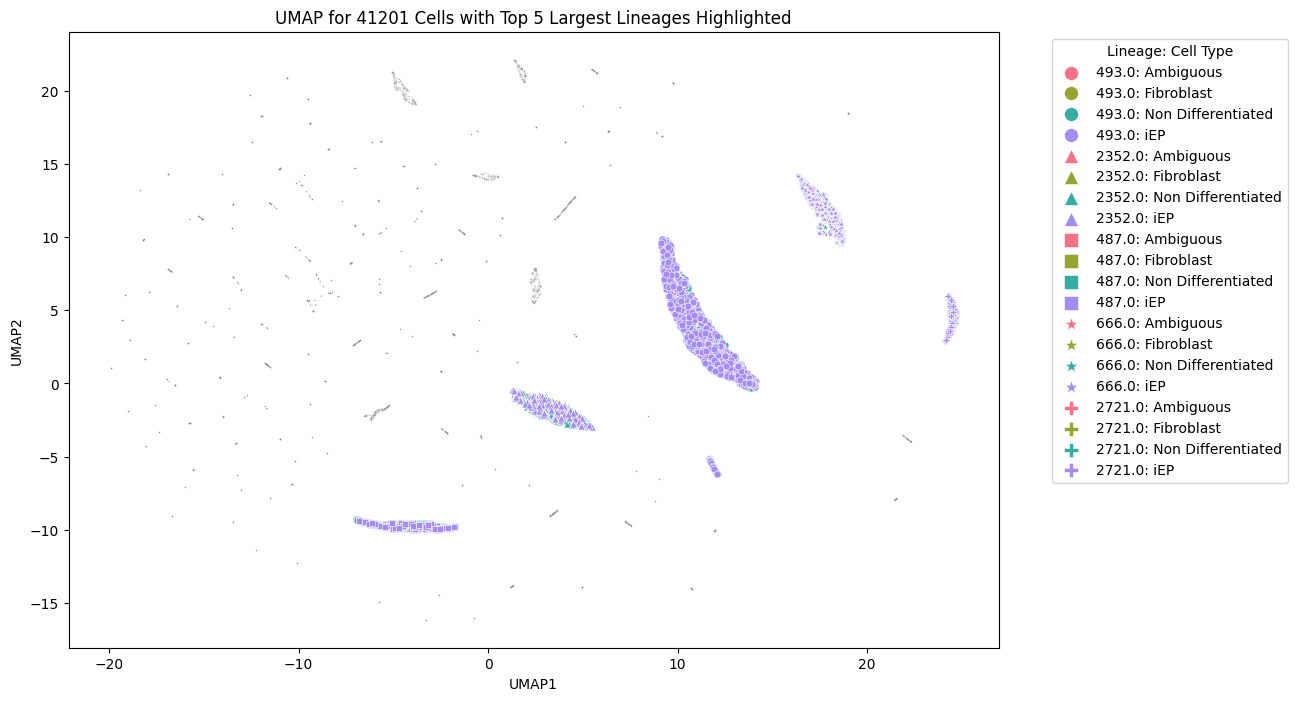

In [1]:
import numpy as np
import umap
import matplotlib.pyplot as plt
from collections import Counter
import anndata as ad
import seaborn as sns

input_dir = "/Users/apple/Desktop/KB/data"
# output_dir = "/Users/apple/Desktop/KB/SCSeq_LineageBarcoding2/SCSeq_LineageBarcoding/SCLineage_ConstrativeLearning/out/plot/feat_713_colab"
num_top_lg_toplot = 5

# Load dataset
data = np.load(input_dir+'/feat_910_bs35_sf0025_biddy_train_test_lineage/scBaseEncoderFeat_Z_bs35_tau0.5.npy')
adata_subset = ad.read_h5ad(input_dir+'/BiddyData/Biddy_train_lineage.h5ad')
adata_subset.obs['Cell type annotation'] = adata_subset.obs["cell_type"]
adata_subset.obs['Cell type annotation'] = adata_subset.obs['Cell type annotation'].cat.add_categories('Non Differentiated')
# Replace NaN values with 'Non Differentiated'
adata_subset.obs['Cell type annotation'].fillna('Non Differentiated', inplace=True)
labels = adata_subset.obs["clone_id"].to_numpy()
num_cells = labels.shape[0]

categories = adata_subset.obs['Cell type annotation'].to_numpy()

print("data shape", data.shape)
print("labels shape", num_cells)

# Initialize UMAP and fit the data
reducer = umap.UMAP()
embedding = reducer.fit_transform(data)

# Determine the top lineages
unique_labels, counts = np.unique(labels, return_counts=True)
top_lineages = unique_labels[np.argsort(-counts)[:num_top_lg_toplot]]

# Define category to color mapping
unique_categories = np.unique(categories)
colors = sns.color_palette('husl', len(unique_categories))
category_to_color = dict(zip(unique_categories, colors))

default_color = 'gray'

# Define marker shapes
marker_shapes = ['o', '^', 's', '*', 'P']  # circle, triangle, square, star, pentagon

plt.figure(figsize=(12, 8))

# Plot all other lineages first
for label in np.unique(labels):
    if label not in top_lineages:
        subset = embedding[labels == label]
        sns.scatterplot(x=subset[:, 0], y=subset[:, 1], color=default_color, s=1, alpha=0.2)

# Plot the top lineages with different shapes
for i, lineage in enumerate(top_lineages):
    subset = embedding[labels == lineage]
    subset_categories = categories[labels == lineage]
    for category in np.unique(subset_categories):
        sns.scatterplot(x=subset[subset_categories == category][:, 0], 
                        y=subset[subset_categories == category][:, 1], 
                        color=category_to_color[category], 
                        marker=marker_shapes[i], 
                        s=25, 
                        alpha=1, 
                        label=f'{lineage}: {category}')

plt.title(f'UMAP for 41201 Cells with Top 5 Largest Lineages Highlighted')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# Create a legend for the categories present in the specific lineage
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Lineage: Cell Type", bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=2)

# plt.savefig(output_dir + 'cell_umap_top_5_largest_plot.png', dpi=300)
plt.show()


In [ ]:
import numpy as np
import umap
import matplotlib.pyplot as plt
import anndata as ad
import seaborn as sns





# Load dataset




input_dir = "/Users/apple/Desktop/KB/data"
num_top_lg_toplot = 5

# Load dataset
data = np.load(input_dir+'/feat_train_test/biddy/bs30_sf0025/scBaseEncoderFeat_Z_bs30_tau0.5.npy')
adata_subset = ad.read_h5ad(input_dir+'/BiddyData/Biddy_train.h5ad')

# Extract clone_id labels
labels = adata_subset.obs["clone_id"].to_numpy()
num_cells = labels.shape[0]

print("data shape", data.shape)
print("labels shape", num_cells)

# Initialize UMAP and fit the data
reducer = umap.UMAP()
embedding = reducer.fit_transform(data)

# Determine the top lineages
unique_labels, counts = np.unique(labels, return_counts=True)
top_lineages = unique_labels[np.argsort(-counts)[:num_top_lg_toplot]]

# Create a custom color palette for the top 5 clone_ids
custom_palette = ['#2878B5', '#9AC9DB', '#F8AC8C', '#C82423', '#FF8884']
default_color = 'gray'

# Create a mapping from clone_id to color for the top 5
lineage_to_color = {lineage: custom_palette[i] for i, lineage in enumerate(top_lineages)}

plt.figure(figsize=(12, 8))

# Plot all other lineages first in gray
for label in np.unique(labels):
    if label not in top_lineages:
        subset = embedding[labels == label]
        plt.scatter(subset[:, 0], subset[:, 1], color=default_color, s=1, alpha=0.2)

# Plot the top lineages with different colors
for lineage in top_lineages:
    subset = embedding[labels == lineage]
    plt.scatter(subset[:, 0], subset[:, 1], color=lineage_to_color[lineage], s=15, alpha=1, label=f'{lineage}')

plt.title(f'UMAP for 41201 Cells with Top 5 Largest Lineages Highlighted')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# Add legend
plt.legend(title="Top 5 Lineages", bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.savefig(output_dir + 'cell_umap_top_5_largest_plot.png', dpi=300)
plt.show()
